In [1]:
import yfinance as yf
import pandas as pd
from datetime import datetime


ticker = 'SBIN.NS'  
df = yf.download(ticker)
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1996-01-01,18.691147,18.978922,18.540184,18.823240,12.205256,43733533
1996-01-02,18.894005,18.964767,17.738192,18.224106,11.816765,56167280
1996-01-03,18.327892,18.568489,17.643839,17.738192,11.501694,68296318
1996-01-04,17.502312,17.832542,17.223972,17.676863,11.461927,86073880
1996-01-05,17.738192,17.785366,17.459852,17.577793,11.397689,76613039
...,...,...,...,...,...,...
2024-06-20,853.000000,853.099976,842.349976,843.750000,843.750000,13985352
2024-06-21,844.900024,848.049988,828.599976,836.299988,836.299988,18990090
2024-06-24,831.500000,836.000000,821.049988,832.700012,832.700012,12715254


In [8]:
import numpy as np
data = df.filter(['Close'])

dataset = data.values

training_data_len = int(np.ceil( len(dataset) * .95 ))

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(20, len(train_data)):
    x_train.append(train_data[i-20:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 21:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(25, return_sequences=False))
model.add(Dense(10))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=10, epochs=13)

[array([0.0061382 , 0.00546675, 0.00492219, 0.00485346, 0.00474243,
       0.00416615, 0.00521297, 0.00428775, 0.00502264, 0.00503322,
       0.00509666, 0.00551962, 0.00467899, 0.00454681, 0.00477944,
       0.00546675, 0.00568352, 0.00498564, 0.00517597, 0.00517597])]
[0.00609590261098036]

[array([0.0061382 , 0.00546675, 0.00492219, 0.00485346, 0.00474243,
       0.00416615, 0.00521297, 0.00428775, 0.00502264, 0.00503322,
       0.00509666, 0.00551962, 0.00467899, 0.00454681, 0.00477944,
       0.00546675, 0.00568352, 0.00498564, 0.00517597, 0.00517597]), array([0.00546675, 0.00492219, 0.00485346, 0.00474243, 0.00416615,
       0.00521297, 0.00428775, 0.00502264, 0.00503322, 0.00509666,
       0.00551962, 0.00467899, 0.00454681, 0.00477944, 0.00546675,
       0.00568352, 0.00498564, 0.00517597, 0.00517597, 0.0060959 ])]
[0.00609590261098036, 0.006566444711301075]

Epoch 1/13
678/678 [==============================] - 21s 21ms/step - loss: 5.6963e-04
Epoch 2/13
678/678 [=============

In [9]:
predictions = model.predict(x_train)
# predictions = scaler.inverse_transform(predictions)
r2 = r2_score(y_train,predictions)
r2

212/212 [==============================] - 4s 11ms/step


0.9983700460035554

In [10]:
from  sklearn.metrics import r2_score
test_data = scaled_data[training_data_len - 20: , :]

x_test = []
y_test = scaled_data[training_data_len:, :]
for i in range(20, len(test_data)):
    x_test.append(test_data[i-20:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
# predictions = scaler.inverse_transform(predictions)
r2 = r2_score(y_test,predictions)
r2

12/12 [==============================] - 0s 9ms/step


0.9742347489886066

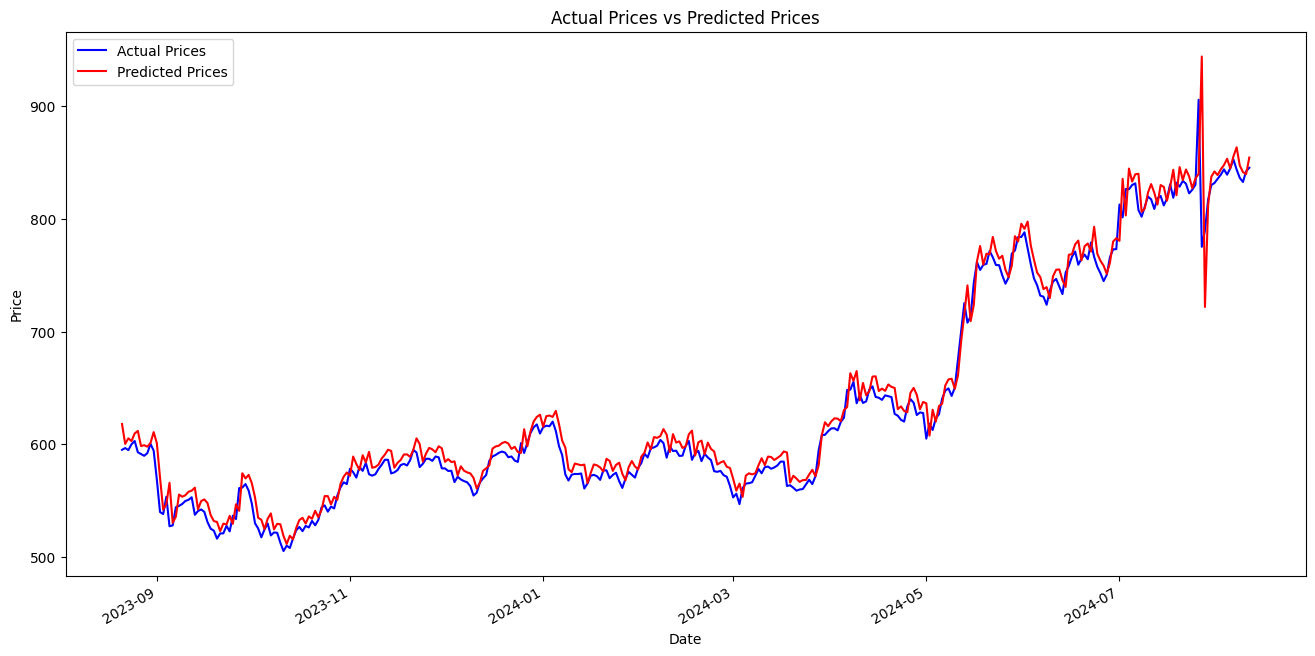

In [11]:
import matplotlib.pyplot as plt
y_test = scaler.inverse_transform(y_test)
predictions = scaler.inverse_transform(predictions)
test_dates = pd.date_range(start='2023-08-21', periods=len(y_test), freq='D')

# Plot the data
plt.figure(figsize=(16, 8))
plt.plot(test_dates, y_test, color='blue', label='Actual Prices')
plt.plot(test_dates, predictions, color='red', label='Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.gcf().autofmt_xdate()  # Rotate date labels for better readability
plt.show()

In [12]:
import joblib


model_file_path = '9.joblib'
scaler_file_path = 'scaler9.joblib'

joblib.dump(model, model_file_path)
joblib.dump(scaler, scaler_file_path)

print(f"Model saved to {model_file_path}")
print(f"Scaler saved to {scaler_file_path}")

Model saved to 9.joblib
Scaler saved to scaler9.joblib
